## RANDOM WALK WITH DRIFT - SPECIAL CONSTRAINTS
>#### See Publication: 

> Kingsley N A

> 26th April, 2020

## Libraries ...

In [29]:
import numpy as np
import pandas as pd
import random as rand
from matplotlib import pyplot

## File ...

In [30]:
filepath = "./RK.csv"

## Computations to derive Min, Max & Mean Values for Volatility+ ...

In [31]:
relp_df = pd.read_csv(filepath)
data29 = relp_df[:29]
data = data29.values.tolist()
#print(data)

#-------------------------------------------------------------
# Hyperparameters
#-------------------------------------------------------------

startcell = 0
workcol = 1
gap = 7 # Gap year to predict
volat = []
volatpol = [] 
volatneg = [] 
i = 2
j = i + gap
num_volat_steps = 21
#print(i,j)

#-------------------------------------------------------------
# Computing Volatility
#-------------------------------------------------------------

for n in range(1 + num_volat_steps):
    
    form1 = "b" + str(i)
    form2 = "b" + str(j) 
    #print(form1,form2)
    
    form1 = data[startcell][workcol]
    form2 = data[startcell + gap][workcol]
    #print(form1,form2)
    
    x = (form2 - form1) / form1
    #print(x)
    
    volat.append(x)
    #print(volat)

    i += 1 
    j += 1
    startcell += 1
    
#-------------------------------------------------------------
# Viewing data so far
#-------------------------------------------------------------
#print(volat)
#dataframes
#df_volat = pd.DataFrame({'col':volat})
#df_volat

# Sorting volat values into pos and neg
for i in volat:
    if i > 0:
        volatpol.append(i)
    else:
        volatneg.append(i)
        
#-------------------------------------------------------------
# Viewing data so far
#-------------------------------------------------------------

#print(volatpol)
#df_volatpol = pd.DataFrame({'col':volatpol})
#df_volatpol

#print(volatneg)
#df_volatneg = pd.DataFrame({'col':volatneg})
#df_volatneg


#-------------------------------------------------------------
# Computing Min, Max, Mean of Volat Pos
#-------------------------------------------------------------

min_volatpol = min(volatpol)
max_volatpol = max(volatpol)
mean_volatpol = sum(volatpol)/len(volatpol)

print("Minimum value of positive volatility: ", min_volatpol)
print("Maximum value of positive volatility:: ", max_volatpol)
print("Mean of positive volatility: ", mean_volatpol)

Minimum value of positive volatility:  0.01197745420385147
Maximum value of positive volatility::  0.4040065342618864
Mean of positive volatility:  0.21818368858867088


## Computation of Targets

In [32]:
#-------------------------------------------------------------
# Targets for Minimal , Maximum, Mean Paths Using Volat Pol
#-------------------------------------------------------------
b30 = data[28][workcol] # Extracting from 2018 value
print(b30)

min_target = b30 * (1 + min_volatpol)
max_target = b30 * (1 + max_volatpol)
mean_target = b30 * (1 + mean_volatpol)

print("Min target: ", min_target)
print("Max target: ", max_target)
print("Mean target: ", mean_target)

36.619
Min target:  37.05760239549084
Max target:  51.41331527813602
Mean target:  44.608668492428535


## Random walk with drift on Minimal Path


Graphical Illustration of the Predictions for Random Walk on Minimal Path from 2019 to Target(2025)


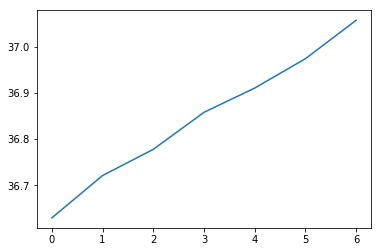

Take home predictions:

2019 :  36.629079223325434
2020 :  36.72087895760508
2021 :  36.777690835821396
2022 :  36.85795805095351
2023 :  36.91060004529429
2024 :  36.97423289657361
2025 :  37.05760239549084


In [33]:
# Min
min_rand_start = b30
min_rand_target = min_target


#----------------------------
# Using numpy ...
min_milestones = np.linspace(min_rand_start, min_rand_target, num=8)
#print(min_milestones)


#------------------------------------------------------------
# Manual ...
#min_mil_a = min_rand_start
#min_mil_z = min_rand_target
#min_mils = 8
#min_step = (min_mil_z - min_mil_a) / (min_mils - 1)

#min_milestones1 = [min_mil_a + min_step * i for i in range(min_mils)]

#print(min_milestones1)

#-------------------------------------------------------------

min_predictions = []

min_r = 0
for i in range(gap):
    min_preds = rand.uniform(min_milestones[min_r], min_milestones[min_r+1])
    min_predictions.append(min_preds)
    min_r += 1
    
#print(min_predictions)

# Since the target year is already known, 
# we assume the last element of the random predictions as the target.
# Therefore ...

min_predictions[-1] = min_rand_target

#print(min_predictions[-1])
#print(min_rand_target)
#print(min_predictions)

print("\nGraphical Illustration of the Predictions for Random Walk on Minimal Path from 2019 to Target(2025)")
pyplot.plot(min_predictions)
pyplot.show()

print("Take home predictions:\n")

min_init_pred_year = 2019 
for i in min_predictions:
    print(min_init_pred_year, ": ", i)
    min_init_pred_year += 1

## Random walk with drift on Max Path


Graphical Illustration of the Predictions for Random Walk on maximal Path from 2019 to Target(2025)


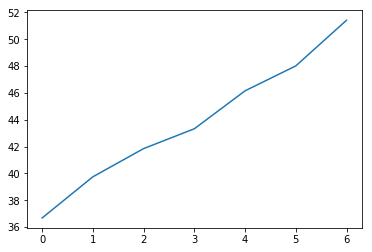

Take home predictions:

2019 :  36.686309290837166
2020 :  39.75101213146701
2021 :  41.85086701199786
2022 :  43.32874780461045
2023 :  46.15527797878285
2024 :  48.012502293865246
2025 :  51.41331527813602


In [34]:
# max
max_rand_start = b30
max_rand_target = max_target


#----------------------------
# Using numpy ...
max_milestones = np.linspace(max_rand_start, max_rand_target, num=8)
#print(max_milestones)


#------------------------------------------------------------
# Manual ...
#max_mil_a = max_rand_start
#max_mil_z = max_rand_target
#max_mils = 8
#max_step = (max_mil_z - max_mil_a) / (max_mils - 1)

#max_milestones1 = [max_mil_a + max_step * i for i in range(max_mils)]

#print(max_milestones1)

#-------------------------------------------------------------

max_predictions = []

max_r = 0
for i in range(gap):
    max_preds = rand.uniform(max_milestones[max_r], max_milestones[max_r+1])
    max_predictions.append(max_preds)
    max_r += 1
    
#print(max_predictions)

# Since the target year is already known, 
# we assume the last element of the random predictions as the target.
# Therefore ...

max_predictions[-1] = max_rand_target

#print(max_predictions[-1])
#print(max_rand_target)
#print(max_predictions)

print("\nGraphical Illustration of the Predictions for Random Walk on maximal Path from 2019 to Target(2025)")
pyplot.plot(max_predictions)
pyplot.show()

print("Take home predictions:\n")

max_init_pred_year = 2019 
for i in max_predictions:
    print(max_init_pred_year, ": ", i)
    max_init_pred_year += 1

## Random walk with drift on Mean Path


Graphical Illustration of the Predictions for Random Walk on Mean Path from 2019 to Target(2025)


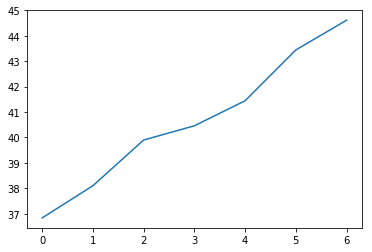

Take home predictions:

2019 :  36.831498260902706
2020 :  38.09827487580973
2021 :  39.895542931930855
2022 :  40.45578316137161
2023 :  41.44026777643636
2024 :  43.43925333496266
2025 :  44.608668492428535


In [35]:
# mean
mean_rand_start = b30
mean_rand_target = mean_target


#----------------------------
# Using numpy ...
mean_milestones = np.linspace(mean_rand_start, mean_rand_target, num=8)
#print(mean_milestones)


#------------------------------------------------------------
# Manual ...
#mean_mil_a = mean_rand_start
#mean_mil_z = mean_rand_target
#mean_mils = 8
#mean_step = (mean_mil_z - mean_mil_a) / (mean_mils - 1)

#mean_milestones1 = [mean_mil_a + mean_step * i for i in range(mean_mils)]

#print(mean_milestones1)

#-------------------------------------------------------------

mean_predictions = []

mean_r = 0
for i in range(gap):
    mean_preds = rand.uniform(mean_milestones[mean_r], mean_milestones[mean_r+1])
    mean_predictions.append(mean_preds)
    mean_r += 1
    
#print(mean_predictions)

# Since the target year is already known, 
# we assume the last element of the random predictions as the target.
# Therefore ...

mean_predictions[-1] = mean_rand_target

#print(mean_predictions[-1])
#print(mean_rand_target)
#print(mean_predictions)

print("\nGraphical Illustration of the Predictions for Random Walk on Mean Path from 2019 to Target(2025)")
pyplot.plot(mean_predictions)
pyplot.show()

print("Take home predictions:\n")

mean_init_pred_year = 2019 
for i in mean_predictions:
    print(mean_init_pred_year, ": ", i)
    mean_init_pred_year += 1

## Hope you enjoyed this repository! 
> #### Check other repositories from me and fork them. 
> #### They might come in handy in your next project.  